## Import Packages

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.
/Users/emilywilliams/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/emilywilliams/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/emilywilliams/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/emilywilliams

## Initialize Training Parameters

In [2]:
np.random.seed(1671)  # for reproducibility

# network and training
NB_EPOCH = 20
BATCH_SIZE = 128 # Size of 
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
OPTIMIZER = RMSprop() # optimizer 
N_HIDDEN = 128 # number of hidden units
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3 # Used for regularization
RESHAPED = 784 # Number of features to be used

## Load MNIST Dataset into training and testing sets
* __Problem 1__: Load MINST dataset using Keras function
* Load into `X_train`, `y_train`, `X_test`, `y_test`

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Reshape Input Data Frame
* Input data is 28x28 greyscale values
* Reshape to a 1D vector with 784 features
* Training data consists of 60,000 examples
* Final data reshaped into a tensor of 60,000 x 784
* __Problem 2__: Reshape `X_train` and `X_test` vectors according to dimensions above
* Cast type as `float32`

In [4]:
X_train = x_train.reshape(60000, 784).astype('float32')
X_test = x_test.reshape(10000, 784).astype('float32')

## Normalize Data
* Greyscale data can be normalized by maximum value (255)
* __Problem 3__: Normalize `X_train` and `X_test` vectors

In [5]:
## Problem 3
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train = X_train / 255
X_test = X_test / 255

60000 train samples
10000 test samples


## Convert array of class matrix to one-hot-vector
* __Problem 4__: Use keras function to one-hot-encode `y_train` and `y_test`. 
* Set to `Y_train` and `Y_test`

In [6]:
# Original class vector
print(y_train)

[5 0 4 ... 5 6 8]


In [7]:
## Problem 4
Y_train = to_categorical(y_train, num_classes=10)
Y_test = to_categorical(y_test, num_classes=10)

In [8]:
# One-hot vector encoding
print(Y_train[3])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## Build Model
* M_HIDDEN = 128 : Hidden units for each Dense layer
* DROPOUT = 0.3 : Randomly setting 30% of weights to 0 at each update during training time
* NB_CLASSES = 10 : Number of output classes
* __Problem 5__ : Build Neural Network using Keras model functions
* Look up `Sequential`, `Dense`, `Activation`
* Print model `summary`

In [15]:
## Problem # 5
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Model Compilation
* Loss function : The loss value that will be minimized by the model will then be the sum of all individual losses
* Optimizer : How to optimize the loss function
* Metrics : Accuracy
* __Problem 6__ : `compile` the model you built from Problem 5
* Use appropriate loss function, optimizer, and performance metric

In [16]:
## Problem 6
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

## Fit Model
* Batch Size : Number of samples per gradient update.
* Epochs: An epoch is an iteration over the entire x and y data provided.
* Validation Split: Fraction of the training data to be used as validation data. 
* __Problem 7__: Fit your model with appropriate batch size, number of epochs, verbosity, and validation split
* Save model fit to a new variable named `history`

In [17]:
## Problem 7
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 52us/step - loss: 0.4423 - accuracy: 0.8743 - val_loss: 0.2123 - val_accuracy: 0.9426
Epoch 2/20
48000/48000 [==============================] - 2s 40us/step - loss: 0.2253 - accuracy: 0.9360 - val_loss: 0.1575 - val_accuracy: 0.9532
Epoch 3/20
48000/48000 [==============================] - 2s 40us/step - loss: 0.1734 - accuracy: 0.9481 - val_loss: 0.1280 - val_accuracy: 0.9634
Epoch 4/20
48000/48000 [==============================] - 2s 42us/step - loss: 0.1446 - accuracy: 0.9581 - val_loss: 0.1161 - val_accuracy: 0.9652
Epoch 5/20
48000/48000 [==============================] - 2s 40us/step - loss: 0.1279 - accuracy: 0.9622 - val_loss: 0.1096 - val_accuracy: 0.9693
Epoch 6/20
48000/48000 [==============================] - 2s 41us/step - loss: 0.1159 - accuracy: 0.9657 - val_loss: 0.0995 - val_accuracy: 0.9714
Epoch 7/20
48000/48000 [==============================] - 2s 39us/s

## Evaluate Test Accuracy
* __Problem 8__ : Score your model using Keras functions

In [18]:
## Problem 8

score = model.evaluate(X_test, Y_test)

print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 28us/step

Test score: 0.09095938113325974
Test accuracy: 0.9763000011444092


## Evaluating Accuracy Over Epochs
* __Problem 9__: Plot accuracy as a function of epochs
* Use `history` for data to plot
* Make sure to include plot labels

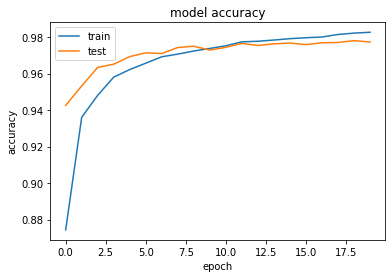

In [19]:
# summarize history for accuracy
## Problem 9

import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"  # Workaround for bug

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

## Evaluating Loss Function Over Epochs
* __Problem 10__: Plot loss function as a function of epochs
* Use `history` for data to plot
* Make sure to include plot labels

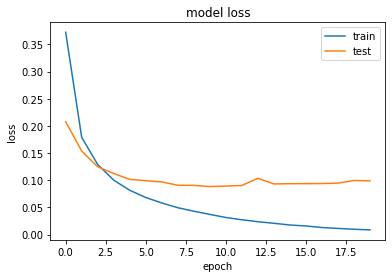

In [14]:
# summarize history for loss
## Problem 10

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

## Questions
1. How does your first NN compare with the literature: https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html
2. Is your model overfit or underfit? 
3. Does your model have high variance or low variance? 

In [15]:
## 1. Very unsure what is being asked here
## 2. Overfit
## 3. High variance